(64, 64)


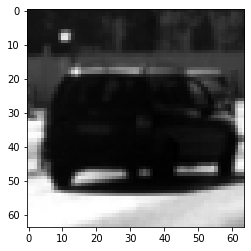

In [1]:
import os
import cv2
import joblib
import numpy as np
from skimage import feature
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

img = cv2.imread('2.png')  #Read vehicle image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting previous image to GRAY
plt.imshow(img,cmap='gray')
print(img.shape) #imamge size 64 x 64 pixels

(64, 64)
(2916,)


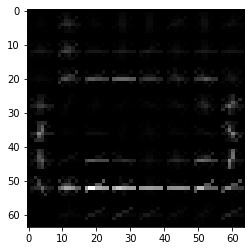

In [3]:
hog_vector,hog_img = feature.hog(img,visualize=True) #Get hog feature vector and hog image using skimage feature library
plt.imshow(hog_img,cmap='gray') #Corresponding HOG image to input image
print(hog_img.shape) #Get the size of hog Image
print(hog_vector.shape) #Get the size of hog vector

In [4]:
data_path=r'D:\4TH YEAR\REserch\DATA SET\archive\data' #Data set path (vehicle and non-vehicle images)
categories=os.listdir(data_path) #category types in the dataset (vehicle and non-vehicle)
print(categories)
labels=np.arange(len(categories)) #train folder contain two categories vehicle and non vehicle
print(labels) #in those folder, corresponding images are stored
label_dict=dict(zip(categories,labels)) #non vehicle as 0 and vehicle as 1
print(label_dict)

['non-vehicles', 'vehicles']
[0 1]
{'non-vehicles': 0, 'vehicles': 1}


In [5]:
img_size=64 
data=[] #Define array to store images
target=[] #Define array to store images class

for category in categories:  #Creating a function to run the below process through the selected folders
    
    imgs_path=os.path.join(data_path,category) #Select a folder and run below funtion through the images in the folder(vehicle and non-vehicle)
    img_names=os.listdir(imgs_path)
    print(imgs_path)
    
    for img_name in img_names: #apply preprocessing to data in dataset
        
        img_path=os.path.join(imgs_path,img_name) #select image by image in the folder
        print(img_path)
        try:
            img=cv2.imread(img_path) #Read images in selected folder
            img=cv2.resize(img,(img_size,img_size)) #Resize the image before applying any filters
            gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting the image to GRAY because colour is not a feature to a vehicle
            gray = cv2.GaussianBlur(gray1,(5,5),2.0) #Add GaussianBlur to reduce noise in image
            data.append(gray) #Append those images to data predefined array
            target.append(label_dict[category]) #Append previous image category into target predefined array
           
        except Exception as e:
            print(img_path,e)

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra10.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra100.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1000.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1001.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1002.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1003.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1004.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1005.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1006.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1007.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1008.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1009.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1164.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1165.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1166.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1167.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1168.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1169.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra117.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1170.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1171.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1172.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1173.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1174.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1175.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1176.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1348.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1349.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra135.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1350.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1351.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1352.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1353.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1354.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra136.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra137.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1373.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1374.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1375.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1376.png
D:\4TH YEAR\REserch\DATA SET\archive\

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1512.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1513.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1514.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1515.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1518.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1519.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra152.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1520.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1521.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1522.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1523.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1524.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1525.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1526.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1641.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1642.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1643.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1644.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1645.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1646.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1647.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1648.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1649.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra165.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1650.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1651.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1652.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1653.png
D:\4TH YEAR\REserch\DATA SET\archiv

D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1787.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1788.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1789.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra179.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1790.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1791.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1792.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1793.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1794.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1795.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1796.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1797.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1798.png
D:\4TH YEAR\REserch\DATA SET\archive\data\non-vehicles\extra1799.png
D:\4TH YEAR\REserch\DATA SET\archiv

KeyboardInterrupt: 

In [ ]:
data_new=np.array(data) #Converting data into numpy array and renaming it to data_new
target_new=np.array(target) #Converting target into numpy array and renaming it to target_new
print(data_new.shape) #Get the shape of the data_new numpy array
print(target_new.shape) #Get the shape of the target_new numpy array

In [ ]:
plt.imshow(data_new[123],cmap='gray') #Testing 123 image of the renamed array
print(target_new[123]) #Testing 123 image's class of the renamed array

In [2]:
#np.save('data12345',data_new) #Saving data_new array 
#np.save('target12345',target_new) #Saving target new array


data = np.load('data12345.npy') #Load data_new array
target = np.load('target12345.npy') #Load target_new array

In [3]:
data_new  = np.array([feature.hog(im) for im in data])#extracting hog feature in every image in the data 


#data_new  = np.array([cv2.Canny(im,100,200) for im in data])
#data_new = data_new.reshape(17760,4096)


#knn  = cv2.getGaborKernel((5,5),3,1*np.pi/4,1*np.pi/4,0.5,0,ktype=cv2.CV_32F)

#data_new  = np.array([cv2.filter2D(im,cv2.CV_8UC3,knn) for im in data])
#data_new = data_new.reshape(17760,4096)






print(data_new.shape) #There were 17760 images in the array and 2916 features i ''

(17756, 2916)


In [4]:
train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.1) #Splitting data from train set to test 
#trainx,testx,trainy,testy                                      x        y
print(train_data.shape) #Getting the size of each set
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(15980, 2916)
(1776, 2916)
(15980,)
(1776,)


In [5]:
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [6]:
model = SVC(kernel='sigmoid') #Apply linear support vector machine to given data set to classify data into two categories
model.fit(train_data,train_target)

SVC(kernel='sigmoid')

In [ ]:
predicted_target = model.predict(test_data) #Tesing accuracy in linear svm 

acc = accuracy_score(test_target,predicted_target)
print(acc)

In [ ]:
matrix = confusion_matrix(test_target,predicted_target) #for the testing, getting the confusion matrix
print(matrix)
display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['non-vehicle','vehicle'])
display.plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['vehicle', 'non-vehicle']))

In [17]:
joblib.dump(model,'ML_Algo_VehicleDetection_SupportVector_sigmoid.sav')

['ML_Algo_VehicleDetection_SupportVector_sigmoid.sav']

In [2]:
model = joblib.load('ML_Algo_VehicleDetection_SupportVector_sigmoid.sav')

In [30]:
def detect(img,h=64,w=64,slide=64): #Creating sliding window tecnique to identify images in selected image
    coordinates=[] #Define coordinated function 
    for y in range (0,img.shape[0]-h,slide): #Reduce hight from image shape
        for x in range(0,img.shape[1]-w,slide): #Reducing width form image shape
            window = img[y:y+h,x:x+w] #Getting a patch for identify the vehicles
            #print(patch.shape)
            hog_img = feature.hog(window) #Applying patch to hog feature which saved in vehicle detection model
            label=model.predict([hog_img]) #Applying predictions
            
            if(label==1):
                coordinates.append((x,y,w,h))
    return np.array(coordinates)

(256, 256, 3)


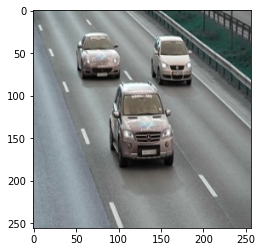

In [31]:
test_img = cv2.imread('888.jpg') #Testing above sliding window tecnique to this test image test, dd, cc
test_img = cv2.resize(test_img,(256,256)) #Resizing the testing image
print(test_img.shape) #Get the image shape in tesing
plt.imshow(test_img,cmap='gray') #Show testing image

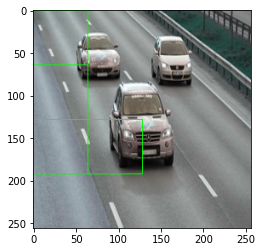

In [32]:
gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY) #Converting test image to GRAY
vehicle = detect(gray) #Apply detect function to image
for x,y,w,h in vehicle:
    
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),1) #Apply rectangle to vehicles in the image
    
#cv2.imshow('test_image',test_img) #Show test image with rectangle
#cv2.waitKey(0) #Close window using ESC
#cv2.destroyAllWindows()
plt.imshow(test_img)

In [11]:
source = cv2.VideoCapture('aa.mp4') #Testing above method to a video tt

while(True): #Creating a loop to run above function in every frame    
    ret,img = source.read() #Getting frames from video    
    img = cv2.resize(img,(0,0),fx=0.2,fy=0.2) #Resizing
    
    if(ret==False): #Apply the above function to video same as the above test image
        break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    vehicle = detect(gray)
    
    for x,y,w,h in vehicle:    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)    
    cv2.imshow('img',img)
    k=cv2.waitKey(1)
    if(k==27):
        break

cv2.destroyAllWindows()
source.release()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
import os
import cv2
import joblib
import numpy as np
from skimage import feature
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

img = cv2.imread('2.png')  #Read vehicle image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting previous image to GRAY
plt.imshow(img,cmap='gray')
print(img.shape) #imamge size 64 x 64 pixels

hog_vector,hog_img = feature.hog(img,visualize=True) #Get hog feature vector and hog image using skimage feature library
plt.imshow(hog_img,cmap='gray') #Corresponding HOG image to input image
print(hog_img.shape) #Get the size of hog Image
print(hog_vector.shape) #Get the size of hog vector

data_path=r'D:\4TH YEAR\REserch\DATA SET\archive\data' #Data set path (vehicle and non-vehicle images)
categories=os.listdir(data_path) #category types in the dataset (vehicle and non-vehicle)
print(categories)
labels=np.arange(len(categories)) #train folder contain two categories vehicle and non vehicle
print(labels) #in those folder, corresponding images are stored
label_dict=dict(zip(categories,labels)) #non vehicle as 0 and vehicle as 1
print(label_dict)

img_size=64 
data=[] #Define array to store images
target=[] #Define array to store images class

for category in categories:  #Creating a function to run the below process through the selected folders
    
    imgs_path=os.path.join(data_path,category) #Select a folder and run below funtion through the images in the folder(vehicle and non-vehicle)
    img_names=os.listdir(imgs_path)
    print(imgs_path)
    
    for img_name in img_names: #apply preprocessing to data in dataset
        
        img_path=os.path.join(imgs_path,img_name) #select image by image in the folder
        print(img_path)
        try:
            img=cv2.imread(img_path) #Read images in selected folder
            img=cv2.resize(img,(img_size,img_size)) #Resize the image before applying any filters
            gray1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting the image to GRAY because colour is not a feature to a vehicle
            gray = cv2.GaussianBlur(gray1,(5,5),2.0) #Add GaussianBlur to reduce noise in image
            data.append(gray) #Append those images to data predefined array
            target.append(label_dict[category]) #Append previous image category into target predefined array
           
        except Exception as e:
            print(img_path,e)

data_new=np.array(data) #Converting data into numpy array and renaming it to data_new
target_new=np.array(target) #Converting target into numpy array and renaming it to target_new
print(data_new.shape) #Get the shape of the data_new numpy array
print(target_new.shape) #Get the shape of the target_new numpy array

plt.imshow(data_new[123],cmap='gray') #Testing 123 image of the renamed array
print(target_new[123]) #Testing 123 image's class of the renamed array

#np.save('data12345',data_new) #Saving data_new array 
#np.save('target12345',target_new) #Saving target new array


data = np.load('data12345.npy') #Load data_new array
target = np.load('target12345.npy') #Load target_new array

data_new  = np.array([feature.hog(im) for im in data])#extracting hog feature in every image in the data 


#data_new  = np.array([cv2.Canny(im,100,200) for im in data])
#data_new = data_new.reshape(17760,4096)


#knn  = cv2.getGaborKernel((5,5),3,1*np.pi/4,1*np.pi/4,0.5,0,ktype=cv2.CV_32F)

#data_new  = np.array([cv2.filter2D(im,cv2.CV_8UC3,knn) for im in data])
#data_new = data_new.reshape(17760,4096)






print(data_new.shape) #There were 17760 images in the array and 2916 features i ''

train_data,test_data,train_target,test_target=train_test_split(data_new,target,test_size=0.1) #Splitting data from train set to test 
#trainx,testx,trainy,testy                                      x        y
print(train_data.shape) #Getting the size of each set
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC

model = SVC(kernal='poly') #Apply linear support vector machine to given data set to classify data into two categories
model.fit(train_data,train_target)

predicted_target = model.predict(test_data) #Tesing accuracy in linear svm 

acc = accuracy_score(test_target,predicted_target)
print(acc)

matrix = confusion_matrix(test_target,predicted_target) #for the testing, getting the confusion matrix
print(matrix)
display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['non-vehicle','vehicle'])
display.plot()

joblib.dump(model,'ML_Algo_VehicleDetection_SupportVector_poly.sav')

model = joblib.load('ML_Algo_VehicleDetection_SupportVector_poly.sav')

def detect(img,h=64,w=64,slide=8): #Creating sliding window tecnique to identify images in selected image
    coordinates=[] #Define coordinated function 
    for y in range (0,img.shape[0]-h,slide): #Reduce hight from image shape
        for x in range(0,img.shape[1]-w,slide): #Reducing width form image shape
            window = img[y:y+h,x:x+w] #Getting a patch for identify the vehicles
            #print(patch.shape)
            hog_img = feature.hog(window) #Applying patch to hog feature which saved in vehicle detection model
            label=model.predict([hog_img]) #Applying predictions
            
            if(label==1):
                coordinates.append((x,y,w,h))
    return np.array(coordinates)

test_img = cv2.imread('dd.jpg') #Testing above sliding window tecnique to this test image test, dd, cc
test_img = cv2.resize(test_img,(256,256)) #Resizing the testing image
print(test_img.shape) #Get the image shape in tesing
plt.imshow(test_img,cmap='gray') #Show testing image

gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY) #Converting test image to GRAY
vehicle = detect(gray) #Apply detect function to image
for x,y,w,h in vehicle:
    
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(0,255,0),1) #Apply rectangle to vehicles in the image
    
#cv2.imshow('test_image',test_img) #Show test image with rectangle
#cv2.waitKey(0) #Close window using ESC
#cv2.destroyAllWindows()
plt.imshow(test_img)

source = cv2.VideoCapture('aa.mp4') #Testing above method to a video tt

while(True): #Creating a loop to run above function in every frame    
    ret,img = source.read() #Getting frames from video    
    img = cv2.resize(img,(0,0),fx=0.2,fy=0.2) #Resizing
    
    if(ret==False): #Apply the above function to video same as the above test image
        break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    vehicle = detect(gray)
    
    for x,y,w,h in vehicle:    
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)    
    cv2.imshow('img',img)
    k=cv2.waitKey(1)
    if(k==27):
        break

cv2.destroyAllWindows()
source.release()